In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import numpy as np
from math import log
from statsmodels.formula.api import ols

In [149]:
df = pd.read_csv("Boston.csv")
len(df.columns)

15

In [150]:
del df['Unnamed: 0']
df.columns.values.tolist() 

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [151]:
df.shape[0]

506

In [152]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [153]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 0, 'percent of households with low socioeconomic status')

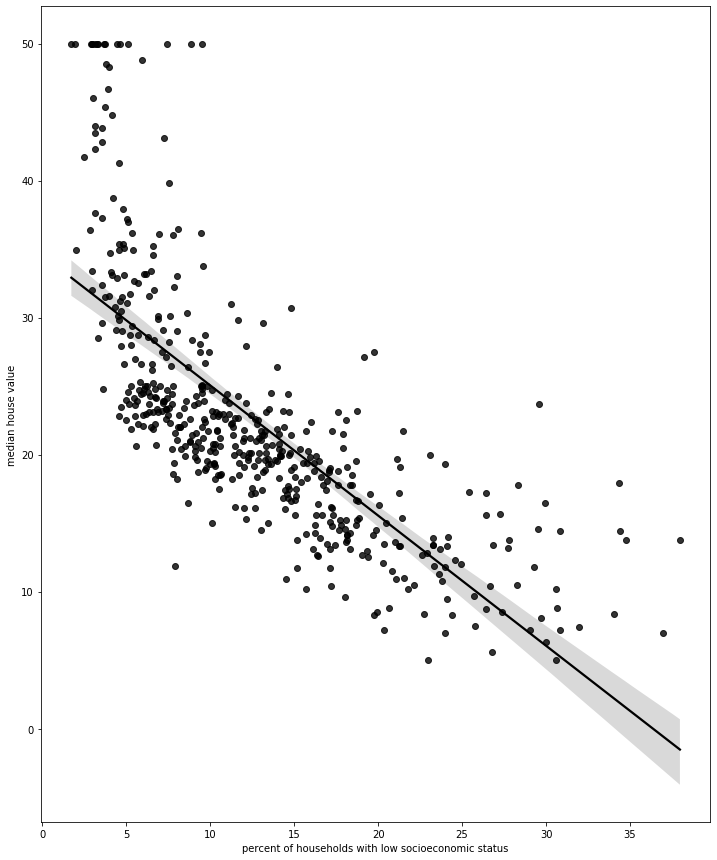

In [154]:
plt.figure(figsize=(12,15))
sns.regplot(x="lstat", y="medv", color="black", data=df);
plt.ylabel("median house value")
plt.xlabel("percent of households with low socioeconomic status")

Text(0.5, 0, 'average number of rooms per house')

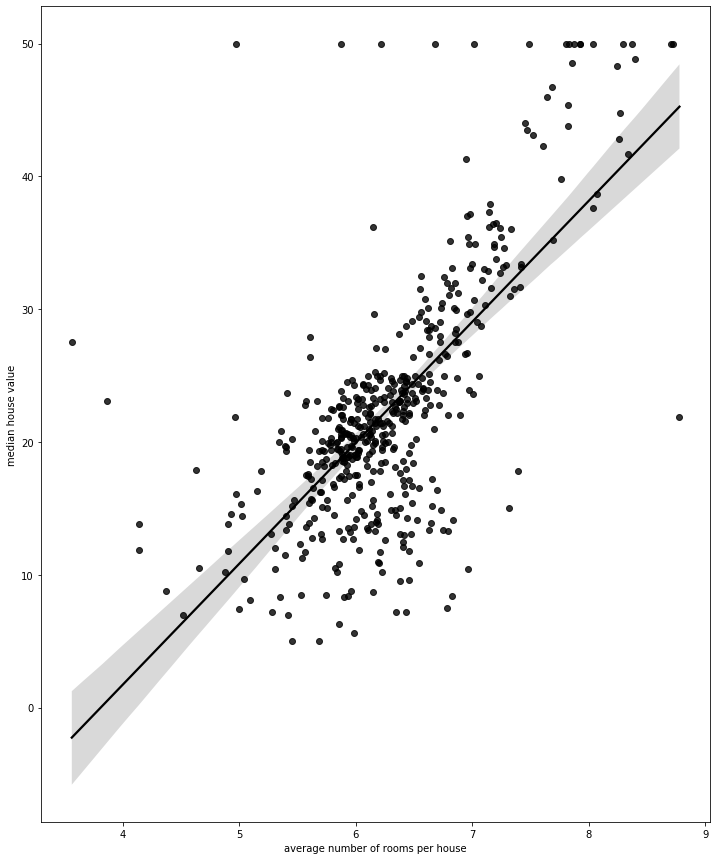

In [155]:
plt.figure(figsize=(12,15))
sns.regplot(x="rm", y="medv", color="black", data=df);
plt.ylabel("median house value")
plt.xlabel("average number of rooms per house")

Text(0.5, 0, 'average age of houses')

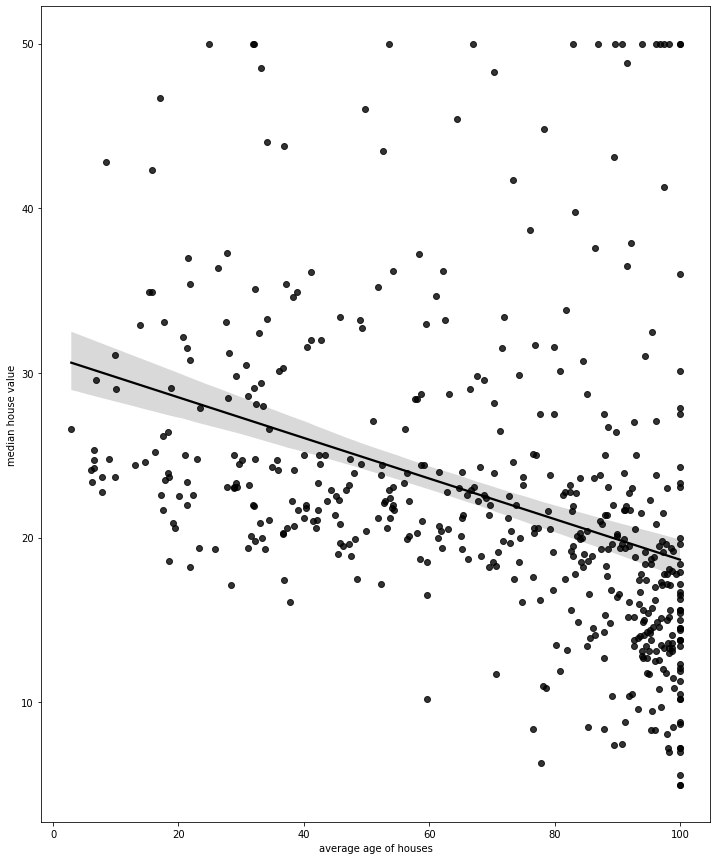

In [156]:
plt.figure(figsize=(12,15))
sns.regplot(x="age", y="medv", color="black", data=df);
plt.ylabel("median house value")
plt.xlabel("average age of houses")

In [157]:
mod = ols('medv ~ lstat', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        18:44:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [158]:
mod = ols('medv ~ rm', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        18:44:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [159]:
mod = ols('medv ~ age', data=df).fit()
print(mod.summary())
print(mod.df_resid)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.57e-18
Time:                        18:44:19   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

Looking at the regression results for median house value and percentage of house holds with low socioeconomic status (medv ~ lstat) we can see that the R-Value indicates that about 54% of variability in median house value can be explained by the percentage of house holds with low socioeconomic status. The p-value is very low less than 0.05 which indicates a strong correlation between lstat and medv. The negative lstat coefficient of -0.95 implies that the relationship is negative, in general, the higher the percentage of house holds with low socioeconomic status the lower the median house value.

Looking at the regression results for median house value and average rooms per house (medv ~ rm) we can see that the R-Value indicates that about 48% of variability in median house value can be explained by the average rooms per house. The p-value is very low, less than 0.05 which indicates a strong correlation between rm and medv. The positive rm coefficient of 9.1 implies that the relationship is positive, in general, the higher average rooms per house the higher the median house value.

Looking at the regression results for median house value and average age of houses (medv ~ age) we can see that the R-Value indicates that about 14% of variability in median house value can be explained by the average age of houses. The p-value is very low, less than 0.05 which indicates a strong correlation between median house value and average age of houses. The negative age coefficient of -0.12 implies that the relationship is weakly negative, in general, the higher the average age of houses the lower the median house value. 


The F-Statistic in each of the tables is much greater than 1 indicating that there is a relationship between medv/lstat, medv/rm and medv/age. 


In [160]:
mod = ols('medv ~ lstat', data=df).fit()
print(mod.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [161]:
mod = ols('medv ~ rm', data=df).fit()
print(mod.conf_int())

                   0          1
Intercept -39.876641 -29.464601
rm          8.278855   9.925363


In [162]:
mod = ols('medv ~ age', data=df).fit()
print(mod.conf_int())

                   0          1
Intercept  29.015752  32.941604
age        -0.149647  -0.096679


These are the confidence intervals for coefficient estimates present in the regression results of the previous section. These represent the range in which the coefficients are likely to fall with a 95% confidence. 1 is 0.975, or the upper limit of this range and 0 is 0.025, or the lower limit of this range. We can say that we are 95% confident that repeated samples for median house value and percentage of low income households (medv~lstat) will produce a intercept coefficient between 33.44 and 35.65 and that the lstat coefficient will be between -1.02 and -0.87.

The second table shows that repeated samples for median house value and average number of rooms (medv~rm) will produce a intercept coefficient between -39.87 and -29.46 and a rm coefficient between 8.27 and 9.92 with a 95% confidence. 

The third table shows that repeated samples for median house value and average age of house (medv~age) will produce a intercept coefficient between 29.01 and 32.94 and a age coefficient between -0.14 and -0.09 with a 95% confidence. 

The uncertainty in confidence intervals arises form sampling, the greater the sample taken from the entire population the more the values will converge. 






In [163]:
lm = ols('medv ~ lstat', df).fit()
new = pd.DataFrame([5, 10, 15], columns=['lstat'])
lm.predict(new)
predictions = lm.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [164]:
lm = ols('medv ~ rm', df).fit()
new = pd.DataFrame([5, 6.5, 8], columns=['rm'])
lm.predict(new)
predictions = lm.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.839924,0.613410,9.634769,12.045079,-2.214474,23.894322
1,24.493088,0.307657,23.888639,25.097536,11.480391,37.505784
2,38.146251,0.776633,36.620414,39.672088,25.058353,51.234149


In [165]:
lm = ols('medv ~ age', df).fit()
new = pd.DataFrame([25, 50 , 75], columns=['age'])
lm.predict(new)
predictions = lm.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,27.899610,0.699094,26.526112,29.273107,11.090368,44.708852
1,24.820542,0.454307,23.927973,25.713110,8.043748,41.597335
2,21.741474,0.388844,20.977518,22.505429,4.971031,38.511917


These tables give prediction interval for the values of median house value based on provided data points. The first table looks at the median house value for 3 different values of lstat (percentage of house holds with low socio-economic status).  We can see the mean for the lstat of 5 is a median house value of 29.8 with lower bound of 17.5 and upperbound of 42.04. The mean value decreases as the value for lstat increases (10,15) suggesting a negative relationship. The lower and upperbounds are quite large for all of the tables which suggest a large variability around the predicted mean

The second table looks at the median house value for 3 different values of rm (average number of rooms). We can see the mean for rm of 5 is the median house value of 10.83 with a lowerbound of -2.21 and upperbound of 23.89. The mean value increases as the value for rm increases (5,6.5,8) suggesting a positive relationship. A negative lowerbound for the house value could also be the result of large variability around the perdicted mean. 

The third tables looks at the median house value for 3 different values of age (average age of house). We can see that the mean for age of 25 is the median house value of 27.89 with lowerbound of 11.09 and upperbound of 44.70. The mean value decreases as the value of age increases (50,70) suggesting a negative relationship. 

In [166]:
mod = ols('medv ~ lstat+rm+age', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.20e-110
Time:                        18:44:19   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.7

Looking at the regression results for median house value againts percentage of house holds with low socio-economic status, average number of rooms and  average age of houses (medv ~ lstat+rm+age) we can see that the R-Value indicates that about 63% of variability in median house value can be explained by the afformentioned values (lstat+rm+age). The pvalue for lstat and rm is very low indicating a statistical significance and strong correlation between the median house value and the afformentioned values. On the other hand the p value of age is very high indicating a low statistical significance and weak correlation between age and median house value. The positive coefficients of rm and age show a positive relationship for age and rm meaning that on average the higher these values are the higher the median house value. The negative coefficient of lstat show that on average the higher this value is the lower the median house value. 
The F-statistic is greater than 1 indicating a relationship between medv/lstat,rm and age. 

In [167]:
mod = ols('medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        18:44:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Looking at the regression results for median house value againts againts all other values (medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat) we can see that the R-Value indicates that about 74% of variability in median house value can be explained by the afformentioned values. The p value is less than 0.05 for crim,zn,chas,nox,rm,dis,rad, tax, ptratio, black and lstat suggesting that these values are statistically significant and show a strong correlation between median house value and the afformentioned values. On the other hands the p values from indus and age are very high suggesting they are not statistically significant and have a weak correlation with median house value. The negative coefficients show that the relationship is negative for crim,nox,dis,tax,ptratio and lstat meaning that the higher these values are the lower the median house value. The positive coefficients show that the relationship is positive for zn,indus,chas,rm, age,rad,black meaning that the higher these values are the higher the median house value. 
The f-statistic is much greater than 1 suggesting that there is a relationship between medv and all of the afformentioned values. 

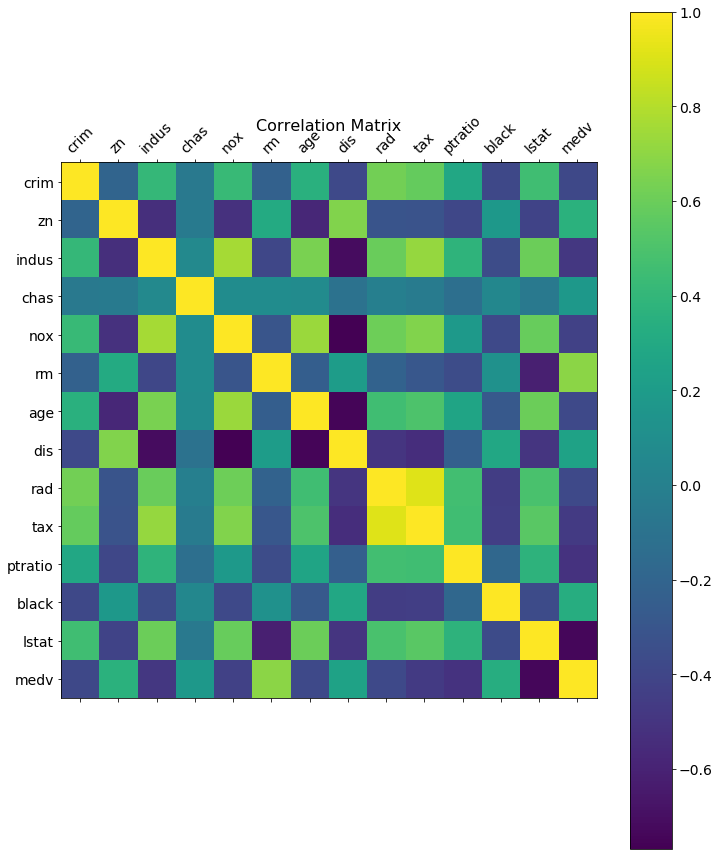

In [168]:
f = plt.figure(figsize=(12,15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

This correlation matrix shows the correlation between the coefficients of different values. A correlation of 1 being a perfect positive correlation, 0 indicates no correlation and -1 indicates perfect negative correlation. A color coded matrix allows us to quickly judge a correlation between any two variables. From this matrix we can see that dis/indus, dis/nox and dis/age are strongly negatively correlatated. While nox/indus, medv/rm and age/nox have a strong positive correlation. 
 

In [169]:
lstat = [5,10,15]
rm = [5,6.5,8]
x = np.array([(x, y) for y in rm for x in lstat])
x.shape
print(x)

[[ 5.   5. ]
 [10.   5. ]
 [15.   5. ]
 [ 5.   6.5]
 [10.   6.5]
 [15.   6.5]
 [ 5.   8. ]
 [10.   8. ]
 [15.   8. ]]


In [170]:
lm = ols('medv ~ lstat+rm', df).fit()
new = pd.DataFrame(x, columns=['lstat','rm'])
lm.predict(new)
predictions = lm.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20.903875,0.856315,19.221481,22.586269,9.889729,31.918021
1,17.692084,0.693873,16.328837,19.055330,6.722152,28.662016
2,14.480292,0.570322,13.359785,15.600799,3.537875,25.422709
3,28.546057,0.377499,27.804387,29.287727,17.635923,39.456192
4,25.334266,0.263915,24.815754,25.852777,14.437027,36.231505
5,22.122474,0.304004,21.525200,22.719748,11.221204,33.023745
6,36.188239,0.663860,34.883959,37.492519,25.225479,47.150999
7,32.976448,0.739470,31.523618,34.429277,21.995024,43.957872
8,29.764656,0.865184,28.064837,31.464475,18.747835,40.781477


The table give prediction for the values of median house value based on provided data points for lstat and rm. (percentage of households with low socioeconomic status and average number of rooms) The table looks at the median house value for 9 different combinations of values for lstat and rm given in the previous line. From this we can gauge the relationship between these two values and their effect on the median house value. Examining lstat of 5 for rm of 5, 6.5 and 8 we can see from rows 0, 3, 6 that the mean medv rises suggesting a positive relationship as the number of rooms increases the mean medv increases. 
Examining lstat of 10 for rm of 5, 6.5 and 8 we can see from rows 1, 4, 7 that medv rises, also suggesting a positive relationship as the number of rooms increases the mean medv increase. The means are however lower than means with lstat of 5 for all values of rm suggesting a negative relationship as lstat increases the mean medv decreases. 
Examining lstat of 15 for rm of 5,6.5 and 8 we can see from rows 2, 5, 8 that medv rises, also suggesting a positive relationship as the number of rooms increases the mean medv increases. The means are also lower than means with lstat of 5 and 10 for all values of rm suggesting a negative relationship.

**Assignment 3**

In [171]:
mod1 = ols('medv ~ lstat+rm+nox+dis+ptratio', df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          3.67e-131
Time:                        18:44:20   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

In [172]:
mod2 = ols('medv ~ lstat*rm+nox+dis+ptratio', df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     290.8
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.48e-159
Time:                        18:44:20   Log-Likelihood:                -1459.9
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     499   BIC:                             2963.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1518      4.880      0.646      0.5

The first table shows the regression results for median house value againts lstat,rm,nox,dis,ptratio (medv~lstat+rm+nox+dis+ptratio) we can see that the R-Value indicates that about 70% of variability in median house value can be explained by the aformentioned values. The p-value for all of the values is very low less than 0.05 which indicates a strong correlation between medv and the aformentioned values. The standard error shows the average distance that the values fall from the regression line as a measure of the dependant variable medv. In this case all of the values follow the regression line quite closely. 

The second table improves the model by introducing an interaction between the percentage of low socioeconomic households and the average number of rooms. (lstat*rm) These two variables interact and have an effect on each other. The percentage of low socioeconomic households has an effect on the average number of rooms and vice versa. We can see that this model is improved as the R-Value indicates that about 77.8% of variability in the median house value can be explained by these values. The P-value of the interaction is also very low.  The * operator includes the variables seperately as well as the interaction between them denoted by the : operator.


In [173]:
mod3 = ols('medv ~ lstat*rm+I((lstat*rm)**2)+nox+dis+ptratio', df).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     253.9
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          8.05e-160
Time:                        18:44:20   Log-Likelihood:                -1455.8
No. Observations:                 506   AIC:                             2928.
Df Residuals:                     498   BIC:                             2961.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.5522 

In [174]:
sm.stats.anova_lm(mod2, mod3)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,498.0,9348.435955,1.0,151.945925,8.094303,0.004623


Table for model 3 shows a non-linear transformation of the interaction between lstat and rm. We used the anova test to quantify the difference between the two fitted models. df_resid shows us the residual degrees of freedom which is calculated as no.observations - no. independant variables - 1, the df_resid is lower for model 3 as it contains an additional independant variable.  The SSR shows us the sum of squared errors which is lower for the model 3 than model 2 indicating a better fit. ss_diff shows us that the differences in ssr between the two models is 151.94. The f value shows us the relationship between relative increase in the sum of squares and the relative increase in degrees of freedom. The p-value is below 0.05 which indicates that these differences are statistically significant between the two models. 

In [175]:
mod4 = ols('medv ~ lstat*rm+I(lstat**1.0)+I(lstat**2.0)+I(lstat**3.0)+I(lstat**4.0)+I(lstat**5.0)+nox+dis+ptratio',df).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.0
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.80e-161
Time:                        18:44:20   Log-Likelihood:                -1443.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     495   BIC:                             2956.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.9246      7.663     

In [176]:
sm.stats.anova_lm(mod2, mod4)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,495.0,8903.772453,4.0,596.609428,8.292038,0.000002


Table for model 4 shows use of polynomial regression which can be used to fit non-linear relationships. The higher the order of the polynomial the more non-linear function can be fit. The anova test shows us that the difference between sum of squared errors between the two models is 596.6 at the cost of 4 more predictors hence df_diff is 4. The P value is less than 0.05 showing us that the differences between the two models are statistically significant

In [177]:
mod5 = ols('medv ~ I(lstat**1.0)+I(lstat**2.0)+I(lstat**3.0)+I(lstat**4.0)+I(lstat**5.0)+rm+np.log(rm)+nox+dis+ptratio',df).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          7.10e-168
Time:                        18:44:20   Log-Likelihood:                -1428.4
No. Observations:                 506   AIC:                             2879.
Df Residuals:                     495   BIC:                             2925.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         172.9866     13.954     

In [178]:
sm.stats.anova_lm(mod2, mod5)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,495.0,8386.756361,4.0,1113.62552,16.431997,1.190966e-12


Table for model 5 shows the addition of logarithmic transformation to model 4. The anova test shows us that the difference in the sum of squared errors between model 2 and model 5 is 1113.6, which indicates a better fit,  at the cost of 4 more predictor values. The P value is less than 0.05 showing us that the differences between the two models are statistically significant. 

**Beat the teacher**

In [179]:
mod5B = ols('medv ~ I(lstat**1.0)+I(lstat**2.0)+I(lstat**3.0)+I(lstat**4.0)+I(lstat**5.0)+rm+np.log(rm)+nox+dis+ptratio+np.log(crim)*lstat+black*crim+ptratio*crim+lstat*zn+nox*rm+tax*lstat',df).fit()
print(mod5B.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.32e-177
Time:                        18:44:20   Log-Likelihood:                -1377.3
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     484   BIC:                             2892.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             90.8330     20

In [180]:
sm.stats.anova_lm(mod5, mod5B)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,495.0,8386.756361,0.0,NaN,NaN,NaN
1,484.0,6852.638290,11.0,1534.118071,9.850395,3.274398e-16


With the addition of several more predictors,tax,black,zn,crim as well as adding of interaction terms has resulted in a model with a higher R-Squared and adjusted R-squared values. The anova test shows that the difference in the sum of squared error between model 5 and model 5B is 1534.1 which indicates a better fit at the cost of 11 more predictor values. The P value is less than 0.05 showing us that the differences between the two models are statistically significant. 

In [181]:
df_car = pd.read_csv('Carseats.csv')
del df_car['Unnamed: 0']
df_car.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [182]:
mod6 = ols('Sales ~ CompPrice+Income+Advertising+Population+Price+Age+Education+ShelveLoc+Urban+US',df_car).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.60e-166
Time:                        18:44:20   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

Looking at the regression results for sales againts all other values ('Sales ~ CompPrice+Income+Advertising+Population+Price+Age+Education+ShelveLoc+Urban+US') we can see that the R-Value indicates that about 87% of variability in sales can be explained by the afformentioned values. The p value is less than 0.05 for ShelvLoc,CompPrice, Income, Advertising,Price, and Age suggesting that these values are statistically significant and show a strong correlation between Sales and the afformentioned values. On the other hands the p values from Urban,US, Education and Population are high suggesting they are not statistically significant and have a weak correlation with Sales. The negative coefficients show that the relationship is weakly negative for price, Age,Education, US[T.Yes] meaning that the higher these values are the lower the Sales. The positive coefficients show that the relationship is positive for Population, Advertising, Income, CompPrice, Urban, ShelvLoc meaning that the higher these values are the higher the Sales. 
The f-statistic is much greater than 1 suggesting that there is a relationship between sales and all of the afformentioned values. 

In [183]:
mod7 = ols('Sales ~ CompPrice+Income+Advertising+Price+ShelveLoc+Income:Advertising+Price:Age',df_car).fit()
print(mod7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     328.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.90e-168
Time:                        18:44:20   Log-Likelihood:                -573.74
No. Observations:                 400   AIC:                             1165.
Df Residuals:                     391   BIC:                             1201.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.2991    

**Beat the Teacher**

In [184]:
mod7B = ols('Sales ~ CompPrice+Income+Advertising+Price+ShelveLoc+Income:Advertising+Price*Age+Price*Advertising+Income*Education+Income*Price',df_car).fit()
print(mod7B.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.04e-167
Time:                        18:44:20   Log-Likelihood:                -562.26
No. Observations:                 400   AIC:                             1153.
Df Residuals:                     386   BIC:                             1208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8593    

In [185]:
sm.stats.anova_lm(mod7, mod7B)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,412.514175,0.0,NaN,NaN,NaN
1,386.0,389.501032,5.0,23.013143,4.561258,0.000471


The addition of several more interaction terms has resulted in a model with a higher R-Squared and adjusted R-squared values. The anova test shows that the difference in the sum of squared error between model 7 and model 7B is 23.01 which indicates a better fit at the cost of 5 more predictor values. The P value is less than 0.05 showing us that the differences between the two models are statistically significant. 